#### Et si on augmentait le "nombre de frames"

* 1 essai: 1 MC tous les 0.15 s
   (rappel: ici small_$B_\theta$, small_$\theta$)

In [1]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio
import random
from psychopy import visual, core, event, gui, data
import MotionClouds as MC

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
exp_name = "Perception de l'orientation"
exp_info = {'participant':''}
subj_info = gui.DlgFromDict(dictionary=exp_info, title=exp_name)
exp_info['exp_name']=exp_name


In [3]:
downscale = 1
fig_width = 21
test_length = 150     # number of trials
fixation_length = .5  # length of fixation, in second
stim1_length = 0.15   # length of first stim, in second
stim2_length = 0.15   

fullscr = False

fullscr = True


In [5]:
%mkdir -p tmp

Un sous-r‚pertoire ou un fichier -p existe d‚j….
Une erreur s'est produite lors du traitement deÿ: -p.
Un sous-r‚pertoire ou un fichier tmp existe d‚j….
Une erreur s'est produite lors du traitement deÿ: tmp.


In [4]:
def generate_random_cloud(theta, B_theta, downscale =1):
    fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0.,
                             B_V=0, theta=theta, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
    im = (mc.rectif(im) * 255).astype('uint8')
    fname = 'tmp/%s_%s.png' % (theta, B_theta)
    imageio.imwrite(fname,im[:, :, 0])  
    return fname
    

In [5]:
win = visual.Window(fullscr=fullscr, color=[0,0,0], winType='pygame', monitor='testMonitor', units='height')
mouse = event.Mouse(visible=False)

fixation = visual.ShapeStim(vertices='cross', win=win, size=0.05, pos=[0, 0], fillColor='black', units='height')
fixation.autolog = False

MC1 = generate_random_cloud(np.pi/2, B_theta=np.pi/2)
bitmap1 = visual.ImageStim(win, MC1, mask='gauss', size=0.8, units='height')
bitmap1.autolog = False 


ans_list = []
N_B_thetas = 3
B_thetas = np.pi*np.logspace(-7, -3.5, N_B_thetas, base=2)
    
std_theta = np.pi/24
for trial in range(test_length):
    clock = core.Clock()
    fixation.draw()
    win.flip()
    
    theta = std_theta * np.random.randn()

    # MC generation
    B_theta = B_thetas[random.randint(0, N_B_thetas-1)]

    MC1 = generate_random_cloud(np.pi/2-theta, B_theta=B_theta) 
    bitmap1.setImage(MC1)

    # Times the trial
    while clock.getTime() < fixation_length + stim1_length + stim2_length :
        if 0.0 <= clock.getTime() < fixation_length: 
            fixation.draw()
        if fixation_length + 0.01 <= clock.getTime() < fixation_length + stim1_length: 
            bitmap1.draw()
            win.flip()
        if fixation_length + stim1_length <= clock.getTime() < fixation_length + stim1_length + stim2_length:
            win.flip()
    
    while True:
        ans = event.waitKeys()

        if ans == ['escape', 'q']:
            win.close()
            core.quit()
        elif ans[0] in ['left', 'right']:
            correct = (np.sign(theta) > 0) and (ans[0]=='right')
            print('At trial ', trial, 'Angle=', '%3.3f' % (theta*180/np.pi), 'answer is ',
                ans[0], '(correct=', correct, '); bandwidth=', '%.3f' % (B_theta*180/np.pi))    
            break

    
    ans_list.append([trial, theta, ans[0], B_theta])

win.close()

At trial  0 Angle= -14.295 answer is  left (correct= False ); bandwidth= 15.910
At trial  1 Angle= -5.413 answer is  left (correct= False ); bandwidth= 1.406
At trial  2 Angle= -3.430 answer is  left (correct= False ); bandwidth= 1.406
At trial  3 Angle= -3.732 answer is  right (correct= False ); bandwidth= 4.730
At trial  4 Angle= -3.692 answer is  left (correct= False ); bandwidth= 15.910
At trial  5 Angle= 5.889 answer is  right (correct= True ); bandwidth= 15.910
At trial  6 Angle= 5.746 answer is  right (correct= True ); bandwidth= 4.730
At trial  7 Angle= 1.633 answer is  left (correct= False ); bandwidth= 15.910
At trial  8 Angle= 7.359 answer is  right (correct= True ); bandwidth= 4.730
At trial  9 Angle= -1.165 answer is  left (correct= False ); bandwidth= 4.730
At trial  10 Angle= 1.105 answer is  left (correct= False ); bandwidth= 4.730
At trial  11 Angle= 7.347 answer is  right (correct= True ); bandwidth= 15.910
At trial  12 Angle= -2.212 answer is  left (correct= False );

In [6]:
import pickle
pickle.dump(ans_list, open('Psychophys_discrim_%s.p' % exp_info['participant'], 'wb'))
            


In [8]:
import matplotlib.pyplot as plt

subj_name_list =  ['JF7','JF8','JF9']

                
subj_data_list = []

for subject in subj_name_list :
    x = pickle.load(open(r'C:\Users\Utilisateur\Documents\psychophysics_data\pilote\B_theta\Psychophys_discrim_%s.p'%subject, 'rb'))

    subj_data_list.append(x)


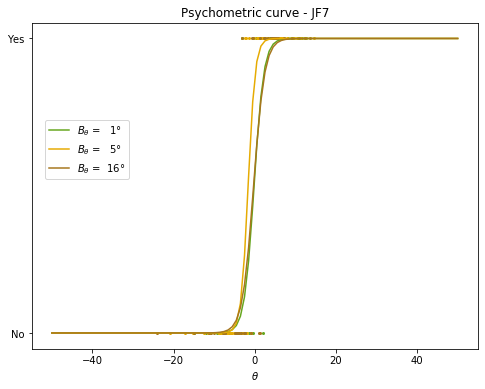

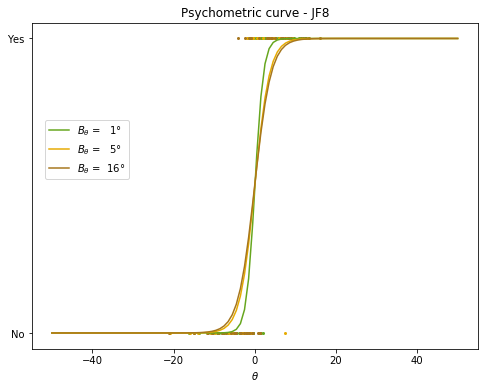

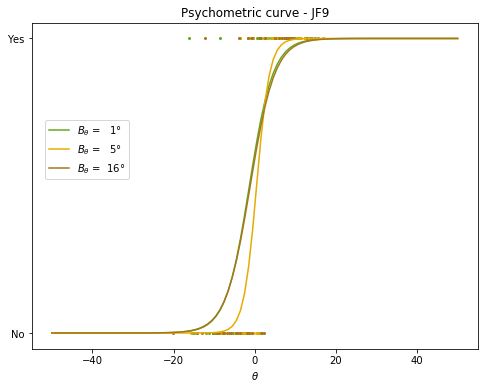

In [9]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib.pyplot import cm

x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))
lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})


b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi)
b_thetas_list = sorted(set(b_thetas_list))

coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    color = iter(cm.Dark2(np.linspace(.5, 1,5)))
    plt.figure(figsize = (8,6)) 
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y = []

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if  i[2] == 'right':  
                        y.append(1)
                else :
                        y.append(0)
      
        X = np.asarray(X)
        X = X[:,np.newaxis]
        col = next(color)
    
        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(X, y)
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' %b_theta,color = col)
            plt.scatter(X, y, s=4, color = col)
        except :
            pass
            
    plt.title('Psychometric curve - %s' % subj_name_list[num])
    plt.xlabel(r'$\theta$')
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show

* 2eme essai: 1 MC tous les 0.1 s

In [1]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio
import random
from psychopy import visual, core, event, gui, data
import MotionClouds as MC

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
exp_name = "Perception de l'orientation"
exp_info = {'participant':''}
subj_info = gui.DlgFromDict(dictionary=exp_info, title=exp_name)
exp_info['exp_name']=exp_name


In [3]:
downscale = 1
fig_width = 21
test_length = 150     
fixation_length = .5  
stim1_length = 0.1   
stim2_length = 0.1   

fullscr = False

fullscr = True


In [4]:
def generate_random_cloud(theta, B_theta, downscale =1):
    fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0.,
                             B_V=0, theta=theta, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
    im = (mc.rectif(im) * 255).astype('uint8')
    fname = 'tmp/%s_%s.png' % (theta, B_theta)
    imageio.imwrite(fname,im[:, :, 0])  
    return fname
    

In [5]:
win = visual.Window(fullscr=fullscr, color=[0,0,0], winType='pygame', monitor='testMonitor', units='height')
mouse = event.Mouse(visible=False)

fixation = visual.ShapeStim(vertices='cross', win=win, size=0.05, pos=[0, 0], fillColor='black', units='height')
fixation.autolog = False

MC1 = generate_random_cloud(np.pi/2, B_theta=np.pi/2)
bitmap1 = visual.ImageStim(win, MC1, mask='gauss', size=0.8, units='height')
bitmap1.autolog = False 


ans_list = []
N_B_thetas = 3
B_thetas = np.pi*np.logspace(-7, -3.5, N_B_thetas, base=2)
    
std_theta = np.pi/24
for trial in range(test_length):
    clock = core.Clock()
    fixation.draw()
    win.flip()
    
    theta = std_theta * np.random.randn()

    # MC generation
    B_theta = B_thetas[random.randint(0, N_B_thetas-1)]

    MC1 = generate_random_cloud(np.pi/2-theta, B_theta=B_theta) 
    bitmap1.setImage(MC1)

    # Times the trial
    while clock.getTime() < fixation_length + stim1_length + stim2_length :
        if 0.0 <= clock.getTime() < fixation_length: 
            fixation.draw()
        if fixation_length + 0.01 <= clock.getTime() < fixation_length + stim1_length: 
            bitmap1.draw()
            win.flip()
        if fixation_length + stim1_length <= clock.getTime() < fixation_length + stim1_length + stim2_length:
            win.flip()
    
    while True:
        ans = event.waitKeys()

        if ans == ['escape', 'q']:
            win.close()
            core.quit()
        elif ans[0] in ['left', 'right']:
            correct = (np.sign(theta) > 0) and (ans[0]=='right')
            print('At trial ', trial, 'Angle=', '%3.3f' % (theta*180/np.pi), 'answer is ',
                ans[0], '(correct=', correct, '); bandwidth=', '%.3f' % (B_theta*180/np.pi))    
            break

    
    ans_list.append([trial, theta, ans[0], B_theta])

win.close()

At trial  0 Angle= 5.459 answer is  right (correct= True ); bandwidth= 1.406
At trial  1 Angle= -7.738 answer is  left (correct= False ); bandwidth= 4.730
At trial  2 Angle= 0.502 answer is  right (correct= True ); bandwidth= 1.406
At trial  3 Angle= -14.133 answer is  left (correct= False ); bandwidth= 1.406
At trial  4 Angle= 10.521 answer is  right (correct= True ); bandwidth= 4.730
At trial  5 Angle= 1.211 answer is  right (correct= True ); bandwidth= 4.730
At trial  6 Angle= 4.721 answer is  right (correct= True ); bandwidth= 4.730
At trial  7 Angle= -0.300 answer is  left (correct= False ); bandwidth= 4.730
At trial  8 Angle= 8.864 answer is  right (correct= True ); bandwidth= 4.730
At trial  9 Angle= 2.332 answer is  right (correct= True ); bandwidth= 1.406
At trial  10 Angle= -9.701 answer is  left (correct= False ); bandwidth= 4.730
At trial  11 Angle= -7.930 answer is  left (correct= False ); bandwidth= 1.406
At trial  12 Angle= -4.242 answer is  left (correct= False ); bandw

In [6]:
import pickle
pickle.dump(ans_list, open('Psychophys_discrim_%s.p' % exp_info['participant'], 'wb'))
            


In [7]:
import matplotlib.pyplot as plt

subj_name_list =  ['JF10']

                
subj_data_list = []

for subject in subj_name_list :
    x = pickle.load(open(r'C:\Users\Utilisateur\Documents\psychophysics_data\pilote\B_theta\Psychophys_discrim_%s.p'%subject, 'rb'))

    subj_data_list.append(x)


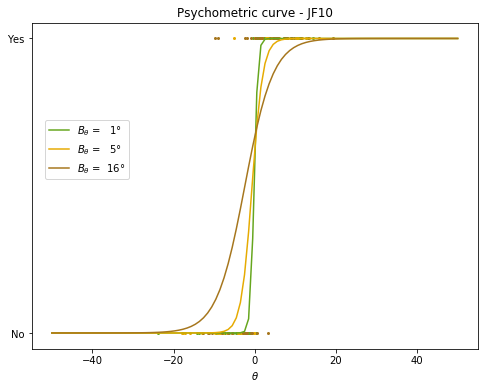

In [8]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib.pyplot import cm

x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))
lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})


b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi)
b_thetas_list = sorted(set(b_thetas_list))

coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    color = iter(cm.Dark2(np.linspace(.5, 1,5)))
    plt.figure(figsize = (8,6)) 
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y = []

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if  i[2] == 'right':  
                        y.append(1)
                else :
                        y.append(0)
      
        X = np.asarray(X)
        X = X[:,np.newaxis]
        col = next(color)
    
        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(X, y)
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' %b_theta,color = col)
            plt.scatter(X, y, s=4, color = col)
        except :
            pass
            
    plt.title('Psychometric curve - %s' % subj_name_list[num])
    plt.xlabel(r'$\theta$')
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show